## Mineração de dados - Semana 7: 

### Exercício sobre detecção de anomalias

Use o algoritmo **Fator Local de Anomalia (LOF - Local Outlier Factor)** e o diagrama de caixa para fazer a detecção de anomalias de uma base de dados que contém as negociações de ações da Petrobrás (PETR4) no período entre novembro de 2019 e abril de 2020.

1. Na análise com o LOF gere um gráfico de dispersão, plotando as anomalias com uma cor diferente dos dados normais. Para a análise, use os atributos **Close** e **Open**. Use o parâmetro **k-vizinhos = 20**. Não precisa definir valor para o parâmetro **contamination**. Sugestão: insira rótulos nas anomalias para ver suas datas.

2. Em seguida, calcule os limites inferior e superior dos atributos **Close**, **Open** e **Volume** (use o parâmetro **sigma = 1.5**) e gere os diagramas de caixa dos três atributos.

Os dados foram extraídos do [Yahoo! Finanças](https://br.financas.yahoo.com/quote/PETR4.SA/history?period1=1572566400&period2=1586390400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true) e estão disponíveis nos links abaixo:

[Ações da PETR4 - 11/2019 a 04/2020](https://query1.finance.yahoo.com/v7/finance/download/PETR4.SA?period1=1572566400&period2=1586390400&interval=1d&events=history&includeAdjustedClose=true)

[Link alternativo](https://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/petr4-nov-19-abr-20.csv)

Descrição dos atributos:
* **Date**: data de operação na bolsa
* **Open**: valor de abertura
* **High**: valor máximo de negociação no dia
* **Low**: valor mínimo de negociação no dia
* **Close**: valor de fechamento
* **Adj Close**: valor de ajuste de fechamento
* **Volume**: quantidade de ações negociadas

O gráfico mostra o valor das ações por dia, mostrando a distribuição da série temporal do período entre 11/2019 e 04/2020

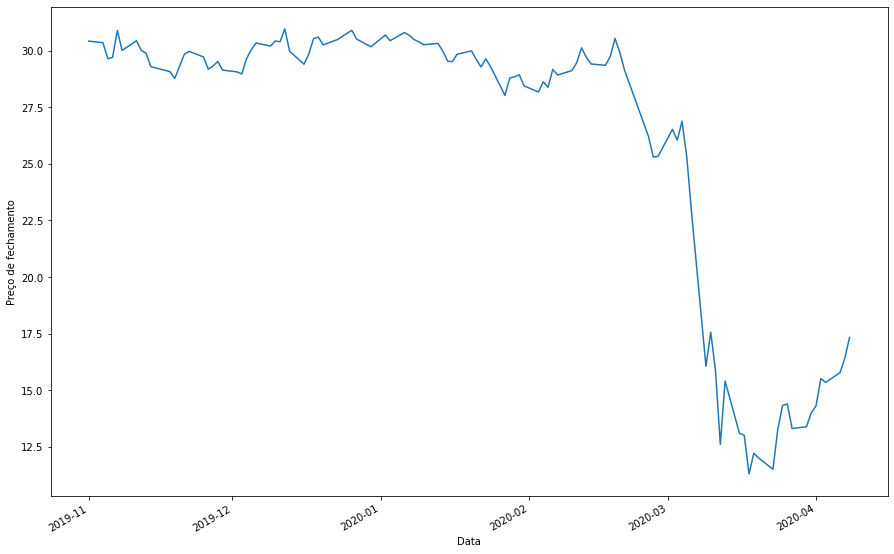

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
plt.rcParams["figure.figsize"] = (15,10)

Carregando os dados

In [ ]:
url = 'https://query1.finance.yahoo.com/v7/finance/download/PETR4.SA?period1=1572566400&period2=1586390400&interval=1d&events=history&includeAdjustedClose=true'
petrobras = pd.read_csv(url, index_col=0, parse_dates=True)
petrobras.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-01,30.590000,31.230000,29.840000,30.430000,24.232862,101210200
2019-11-04,30.889999,31.219999,29.959999,30.360001,24.177120,81023400
2019-11-05,30.410000,30.600000,29.580000,29.650000,23.611712,92980900
2019-11-06,30.049999,30.700001,28.100000,29.709999,23.659494,154003100
2019-11-07,30.000000,31.070000,29.540001,30.900000,24.607145,96329000


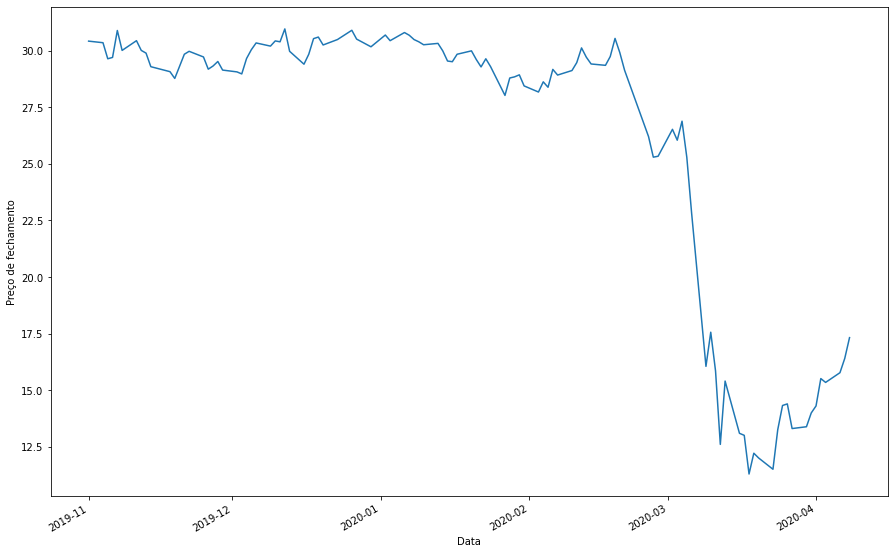

In [ ]:
petrobras['Close'].plot()
plt.ylabel('Preço de fechamento')
plt.xlabel('Data')
plt.show()

In [ ]:
petrobras.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 106 entries, 2019-11-01 to 2020-04-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       106 non-null    float64
 1   High       106 non-null    float64
 2   Low        106 non-null    float64
 3   Close      106 non-null    float64
 4   Adj Close  106 non-null    float64
 5   Volume     106 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 5.8 KB


#### Pré-visualizando os dados gerados

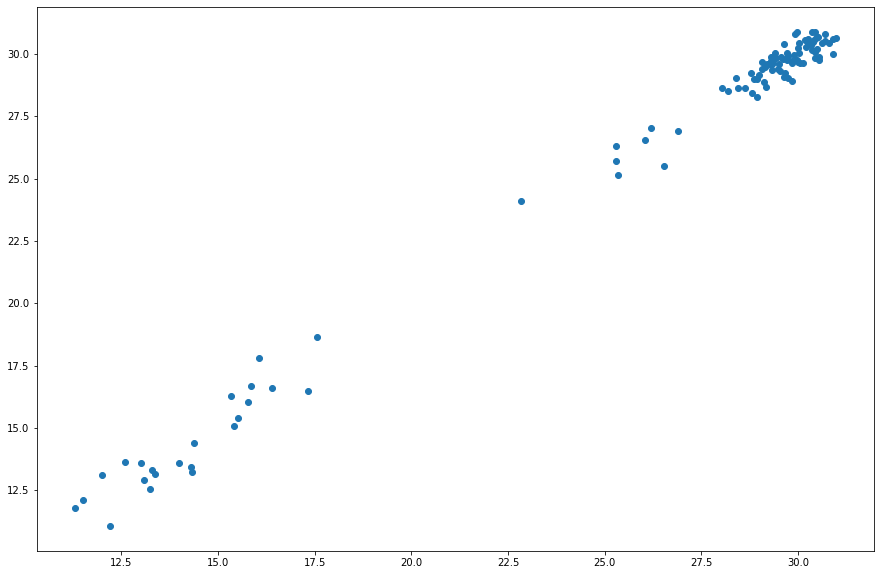

In [ ]:
plt.scatter(petrobras['Close'], petrobras['Open'])
plt.show()

#### Usando o algoritmo Fator Local de Anomalia (LOF) para definir um modelo de predição, k-vizinhos = 20.

In [ ]:
k_vizinhos = 20
lof = LocalOutlierFactor(n_neighbors=k_vizinhos)

#### Ajustando o modelo com a função **fit_predict()**

In [ ]:
petrobras_2d = petrobras[['Close','Open']]
predicao = lof.fit_predict(petrobras_2d)

#### Lista contendo anomalias (-1)

In [ ]:
predicao

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1])

#### Vamos visualizar as anomalias. 

Primeiro, vamos extrair somente as anomalias.

In [ ]:
lof_indice = np.where(predicao==-1) 
anomalias = petrobras_2d.iloc[lof_indice]

Depois, vamos plotar todos os dados e em seguida, as anomalias em vermelho.

O código abaixo inclui os rótulos das anomalias, assim é possível ver que as anomalias são os objetos das datas em que houve uma grande dos valores da ação da PETR4.

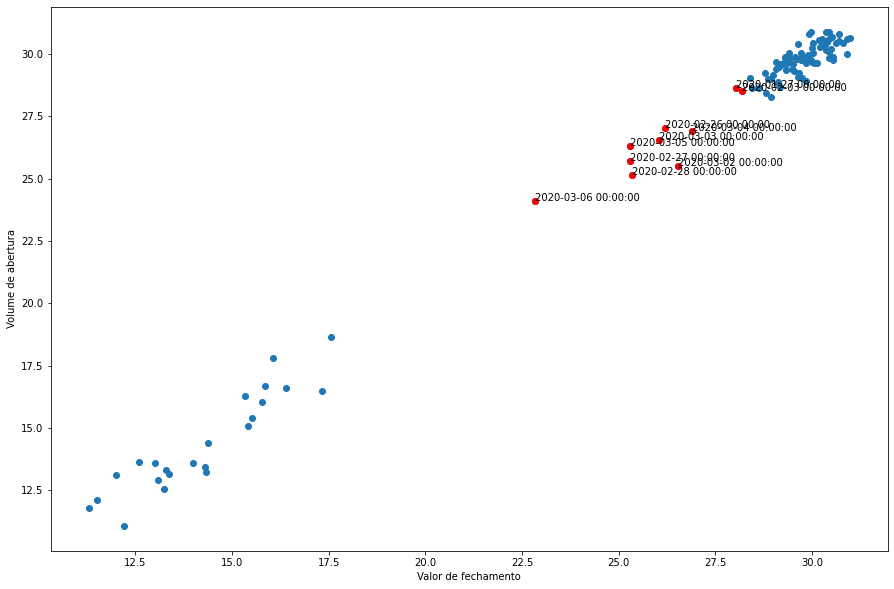

In [ ]:
fig, eixo = plt.subplots()

eixo.scatter(petrobras_2d['Close'], petrobras_2d['Open'])
eixo.scatter(anomalias['Close'], anomalias['Open'], color='red')
eixo.set_xlabel('Valor de fechamento')
eixo.set_ylabel('Volume de abertura')

data_anomalias = petrobras.index[lof_indice]

for i, texto in enumerate(data_anomalias):
    eixo.annotate(texto, (anomalias.iloc[i]['Close'], anomalias.iloc[i]['Open']))

plt.show()

#### Veja a data das anomalias

In [ ]:
data_anomalias

DatetimeIndex(['2020-01-27', '2020-02-03', '2020-02-26', '2020-02-27',
               '2020-02-28', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06'],
              dtype='datetime64[ns]', name='Date', freq=None)

As ações da petrobrás tiveram uma queda expressiva entre 21/02/2020 e 20/03/2020. Essa queda foi consequência de uma disputa entre Rússia e Arábia Saudita que derrubou o preço do petróleo.

Mais em : https://einvestidor.estadao.com.br/mercado/petrobras-maiores-quedas-valor-de-mercado/

### Calculando os limites inferior e posterior dos dados

In [ ]:
fechamento = petrobras['Close']
abertura = petrobras['Open']
volume = petrobras['Volume']

#### Range interquartil, q1 e q3

In [ ]:
fechamento_q1 = petrobras['Close'].quantile(0.25)
fechamento_q3 = petrobras['Close'].quantile(0.75)
fechamento_ri = fechamento_q3 - fechamento_q1
print(f'Fechamento - Q1: {fechamento_q1}, Q3: {fechamento_q3} e RI: {fechamento_ri}')

Fechamento - Q1: 25.51749975, Q3: 30.04249925 e RI: 4.5249995


In [ ]:
abertura_q1 = petrobras['Open'].quantile(0.25)
abertura_q3 = petrobras['Open'].quantile(0.75)
abertura_ri = abertura_q3 - abertura_q1
print(f'Abertura - Q1: {abertura_q1}, Q3: {abertura_q3} e RI: {abertura_ri}')

Abertura - Q1: 25.87249925, Q3: 30.049999 e RI: 4.177499749999999


In [ ]:
volume_q1 = petrobras['Volume'].quantile(0.25)
volume_q3 = petrobras['Volume'].quantile(0.75)
volume_ri = volume_q3 - volume_q1
print(f'Volume - Q1: {volume_q1}, Q3: {volume_q3} e RI: {volume_ri}')

Volume - Q1: 37563400.0, Q3: 101356975.0 e RI: 63793575.0


####  Vamos definir os limiares inferior e superior usando o parâmetro sigma = 1.5

In [ ]:
sigma = 1.5

In [ ]:
fechamento_lim_inf = fechamento_q1 - (fechamento_ri * sigma)
fechamento_lim_sup = fechamento_q3 + (fechamento_ri * sigma)
print(f'Fechamento - limite inferior: {fechamento_lim_inf}, limite superior: {fechamento_lim_sup}')

Fechamento - limite inferior: 18.7300005, limite superior: 36.8299985


In [ ]:
abertura_lim_inf = abertura_q1 - (abertura_ri * sigma)
abertura_lim_sup = abertura_q3 + (abertura_ri * sigma)
print(f'Abertura - limite inferior: {abertura_lim_inf}, limite superior: {abertura_lim_sup}')

Abertura - limite inferior: 19.606249625000004, limite superior: 36.316248625


In [ ]:
volume_lim_inf = volume_q1 - (volume_ri * sigma)
volume_lim_sup = volume_q3 + (volume_ri * sigma)
print(f'Volume - limite inferior: {volume_lim_inf}, limite superior: {volume_lim_sup}')

Volume - limite inferior: -58126962.5, limite superior: 197047337.5


### Detectando anomalias com o diagrama de caixa. 
Atributos: **Close**, **Open** e **Volume**

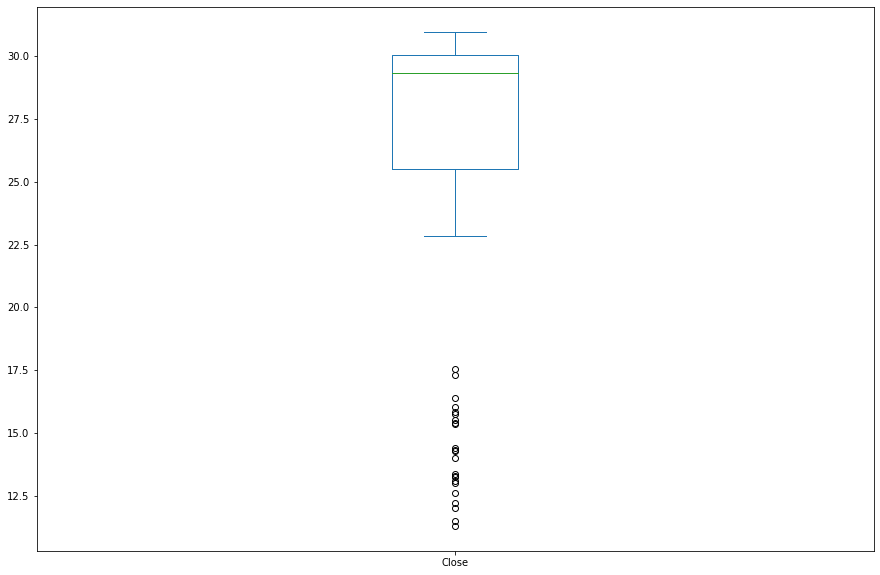

In [ ]:
petrobras['Close'].plot(kind='box')

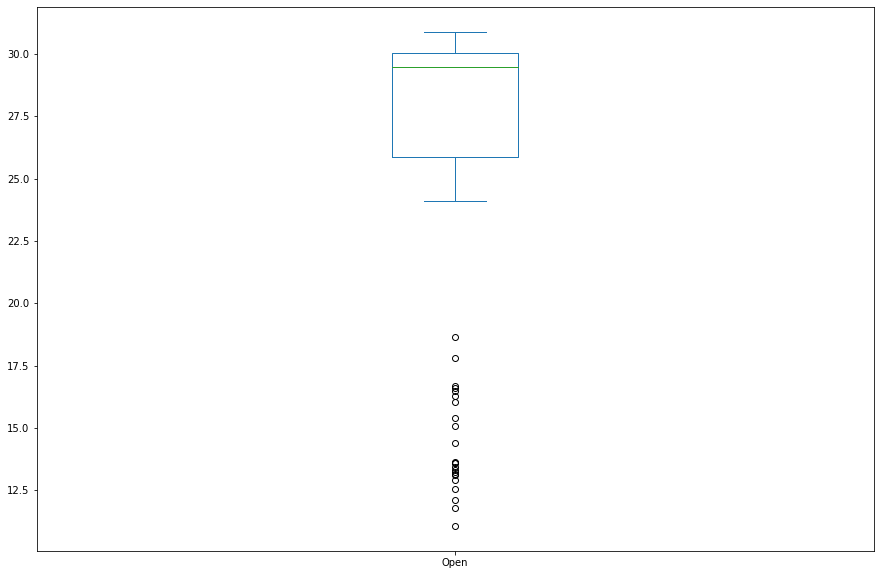

In [ ]:
petrobras['Open'].plot(kind='box')

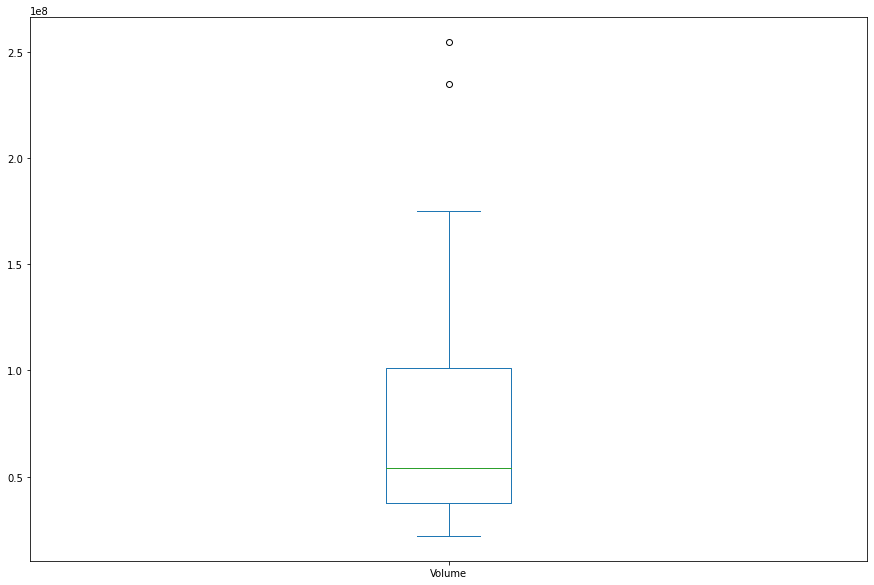

In [ ]:
petrobras['Volume'].plot(kind='box')


Espera-se que os resultados obtidos no seu exercício sejam semelhantes aos apresentados neste caderno. Confira e compare os resultados. 

Aproveite e continue praticando detecção de anomalias usando outras bases de dados e outros dos algoritmos existentes.